In [1]:
import wandb
import numpy as np
import sys
import torch
import torch.utils.data as Data
from torch.utils.data import DataLoader
from torch.utils.data.sampler import SubsetRandomSampler
import pytorch_lightning as pl
from pytorch_lightning.loggers import WandbLogger
from pytorch_lightning.callbacks import LearningRateMonitor
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import pearsonr
import torch.nn as nn
import glob
import xarray as xr
import matplotlib.pyplot as plt


BASE = '/scratch/ab10313/pleiades/'
PATH_NN= BASE+'NN_data_smooth/'
save_path=BASE+"trained_models"


import submeso_ml.systems.regression_system as regression_system
import submeso_ml.models.fcnn as fcnn
import submeso_ml.data.dataset as dataset



In [2]:
# use GPUs if available
if torch.cuda.is_available():
    print("CUDA Available")
    device = torch.device('cuda')
else:
    print('CUDA Not Available')
    device = torch.device('cpu')

CUDA Not Available


In [ ]:
# data loader res 1_12
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR', 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], res='1_12')

test_loader_1_12=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)


# data loader res 1_8
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR',  'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], res='1_8')

test_loader_1_8=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)



# data loader res 1_4
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR', 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], res='1_4')

test_loader_1_4=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)



# data loader res 1_2
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR', 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], res='1_2')

test_loader_1_2=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)



# data loader res 1
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR', 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], res='1')

test_loader_1=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)


In [5]:
#locations
location_index = np.zeros(846*12)
location_month_index= np.zeros(846*12)


for i in range(12):
    for j in range(846):
        location_index[i*846+j] = i
        location_month_index[i*846+j] = np.floor(j/60)


In [3]:
# load trained models
model_1_12 = torch.load('/scratch/ab10313/pleiades/old_trained_models/trained_models/fcnn_k3_l3_select_1_12.pt')
model_1_8 = torch.load('/scratch/ab10313/pleiades/old_trained_models/trained_models/fcnn_k3_l3_select_1_8.pt')
model_1_4 = torch.load('/scratch/ab10313/pleiades/old_trained_models/trained_models/fcnn_k3_l3_select_1_4.pt')
model_1_2 = torch.load('/scratch/ab10313/pleiades/old_trained_models/trained_models/fcnn_k3_l3_select_1_2.pt')
model_1 = torch.load('/scratch/ab10313/pleiades/old_trained_models/trained_models/fcnn_k3_l3_select_1.pt')

In [4]:
PATH_LIST_full = glob.glob(BASE+'*_smooth/preprcossed_data/')

In [5]:
PATH_LIST_full

['/scratch/ab10313/pleiades/15_bengal_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/12_agulhas_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/11_new_zealand_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/08_kuroshio_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/10_north_pacific_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/04_equator_atlantic_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/01_gulf_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/03_south_atlantic_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/05_argentina_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/13_australia_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/06_california_smooth/preprcossed_data/',
 '/scratch/ab10313/pleiades/14_indian_ocean_smooth/preprcossed_data/']

In [28]:
#label_list = ['Arabian Sea','Malvinas Current', 'New Zealand', 'North Pacific', 'Equatorial Atlantic',
#              'Gulf Stream', 'South Atlantic', 'Agulhas Current', 'South Pacific', 'Indian Ocean', 'Kuroshio Current','California Current' ]

#label_list = ['Arabian Sea','Malvinas Current', 'New Zealand', 'North Pacific', 'Equatorial Atlantic',
#              'Gulf Stream', 'South Atlantic', 'Agulhas Current', 'South Pacific', 'Indian Ocean', 'Kuroshio Current','California Current' ]


label_list = ['Arabian Sea','Agulhas Current', 'New Zealand', 'Kuroshio Current', 'North Pacific', 'Equatorial Atlantic',
              'Gulf Stream', 'South Atlantic', 'Malvinas Current', 'South Pacific', 'California Current','Indian Ocean' ]

In [ ]:
# prediction and target of each model

# 1_12
for x_data, y_data in test_loader_1_12:
    prediction_1_12 = model_1_12(x_data.to(device)).detach().numpy() 
    target_1_12 = y_data.detach().numpy()


# 1_8 
for x_data, y_data in test_loader_1_8:
    prediction_1_8 = model_1_8(x_data.to(device)).detach().numpy() 
    target_1_8 = y_data.detach().numpy()

    
# 1_4 
for x_data, y_data in test_loader_1_4:
    prediction_1_4 = model_1_4(x_data.to(device)).detach().numpy() 
    target_1_4 = y_data.detach().numpy()

    
    
# 1_2
for x_data, y_data in test_loader_1_2:
    prediction_1_2 = model_1_2(x_data.to(device)).detach().numpy() 
    target_1_2 = y_data.detach().numpy()

    
    
# 1
for x_data, y_data in test_loader_1:
    prediction_1 = model_1(x_data.to(device)).detach().numpy() 
    target_1 = y_data.detach().numpy()



In [ ]:
# Physics based-paramerization
WB_FK08_param_1 = 0.07*np.load(BASE+'NN_data_1/'+'WB_FK08_param.npy')[submeso_dataset.test_ind]
WB_FK08_param_1_2 = 0.07*np.load(BASE+'NN_data_1_2/'+'WB_FK08_param.npy')[submeso_dataset.test_ind]
WB_FK08_param_1_4 = 0.07*np.load(BASE+'NN_data_1_4/'+'WB_FK08_param.npy')[submeso_dataset.test_ind]
WB_FK08_param_1_8 = 0.07*np.load(BASE+'NN_data_1_8/'+'WB_FK08_param.npy')[submeso_dataset.test_ind]
WB_FK08_param_1_12 = 0.07*np.load(BASE+'NN_data_1_12/'+'WB_FK08_param.npy')[submeso_dataset.test_ind]


# prediction and target by location

In [29]:
# sort by latitude

lat_rad = np.empty(12)
PATH_LIST = glob.glob(BASE+'*_smooth/preprcossed_data/lat.nc')
i_lat_path = 0

for i_lat in range(12):
    #if i_lat == 1 or i_lat ==10 or i_lat ==11:
    #    lat_rad[i_lat] = np.NaN
    #else:
    #    print(i_lat_path)
        lat_rad[i_lat] = xr.open_dataarray(PATH_LIST[i_lat]).values.mean()
    #    i_lat_path = i_lat_path+1
    
    
lat_rad_sorted = np.sort(lat_rad)[::-1]
lat_ind_sorted = np.argsort(lat_rad)[::-1]


# feature importance by resolution

In [6]:
def Jacobian_halo(x,y):
    if y.shape[1] != 1:
        print('wrong shape')
  
    dydx = torch.zeros(x.shape[1])

    grad = torch.autograd.grad(
        outputs=y, inputs=x,
        grad_outputs=torch.ones_like(y),
        allow_unused=True, retain_graph=True, create_graph=True)[0]

    if grad.shape != x.shape:
        print('Error in dimensions')

    return grad.nanmean(dim=0)



In [14]:
res_strg = ['1_12','1_8','1_4','1_2','1']
midpoints = [60,40,20,10,5]
r_max = np.sqrt(8**2+8**2)
jacob_ftr_frac_r_res = np.empty((5,10,round(r_max)+1))

for i_res in range(5):
    
    submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR', 'HML', 'TAU',
              'Q', 'HBL', 'div', 'vort', 'strain'], res=res_strg[i_res])

    test_loader=DataLoader(
    submeso_dataset,
    num_workers=10,
    batch_size=len(submeso_dataset.test_ind),
    sampler=submeso_dataset.test_ind)

    model = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k3_l3_select_'+res_strg[i_res]+'.pt')

    
    for x_data, y_data in test_loader:
        x_input= x_data
        x_input.requires_grad = True
        y_output = model(x_input.to(device))
    
    jacobian_halo = Jacobian_halo(x_input,y_output[:,:,midpoints[i_res],midpoints[i_res]])
    mid = midpoints[i_res]
    
    jacob_ftr_frac_r = np.empty((10,round(r_max)+1))

    for i_ftr in range(10):
        jacob_ftr = jacobian_halo.detach().numpy()[i_ftr]
        jacob_ftr_sum_r = np.empty((round(r_max)+1,1))
        for ir in range(round(r_max)+1):
            jacob_ftr_sum = 0
            for i in range(mid*2):
                for j in range(mid*2):
                    if (i-mid)**2+(j-mid)**2 <= (ir)**2:
                        jacob_ftr_sum  = jacob_ftr_sum + np.abs(jacob_ftr[i,j])
            jacob_ftr_sum_r[ir]= jacob_ftr_sum
        jacob_ftr_frac_r[i_ftr,:] = np.squeeze(jacob_ftr_sum_r[:])/jacob_ftr_sum_r[-1]
    jacob_ftr_frac_r_res[i_res,:,:] = jacob_ftr_frac_r[:,:]


KeyboardInterrupt



In [15]:
res_strg = ['1_12','1_8','1_4','1_2','1']
midpoints = [60,40,20,10,5]
r_max = np.sqrt(8**2+8**2)

# example of halo for 1/4 case
submeso_dataset=dataset.SubmesoDataset(['grad_B','FCOR', 'HML', 'TAU',
          'Q', 'HBL', 'div', 'vort', 'strain'], res='1_4')

i_res = 2

test_loader=DataLoader(
submeso_dataset,
batch_size=len(submeso_dataset.test_ind),
sampler=submeso_dataset.test_ind)

model = torch.load('/scratch/ab10313/pleiades/trained_models/fcnn_k5_l3_res_'+res_strg[i_res]+'_tmp.pt')


for x_data, y_data in test_loader:
    x_input= x_data
    x_input.requires_grad = True
    y_output = model(x_input.to(device))

jacobian_halo= Jacobian_halo(x_input,y_output[:,:,midpoints[i_res],midpoints[i_res]])


In [19]:
jacobian_halo.shape

torch.Size([9, 40, 40])

In [7]:
np.save(save_path+'/jacob_ftr_frac_r_res',jacob_ftr_frac_r_res)

NameError: name 'jacob_ftr_frac_r_res' is not defined

In [21]:
jacob_ftr_frac_r_res = np.load(BASE+'old_trained_models/trained_models/jacob_ftr_frac_r_res.npy')

In [22]:
jacob_ftr_frac_r_res.shape

(5, 10, 12)

In [7]:
res_strg = ['1_12','1_8','1_4','1_2','1']
midpoints = [60,40,20,10,5]
r_max = np.sqrt(8**2+8**2)

In [17]:
input_features_for_plot = [r'$\overline{\nabla b}^z$', '$\overline{f}$','$N^2$','$\overline{H_{ML}}$',r'$\overline{\tau}$', '$\overline{Q}$','$\overline{H_{BL}}$',
                 '$\overline{\delta}^z$', '$\overline{\zeta}^z$', '$\overline{\sigma}^z$' ]

In [26]:
#remove N2 from array 
jacob_ftr_frac_r_res = np.delete(jacob_ftr_frac_r_res,2,1)
#input_features_for_plot.pop(2)

'$N^2$'

In [24]:
jacob_ftr_frac_r_res.shape

(5, 9, 12)

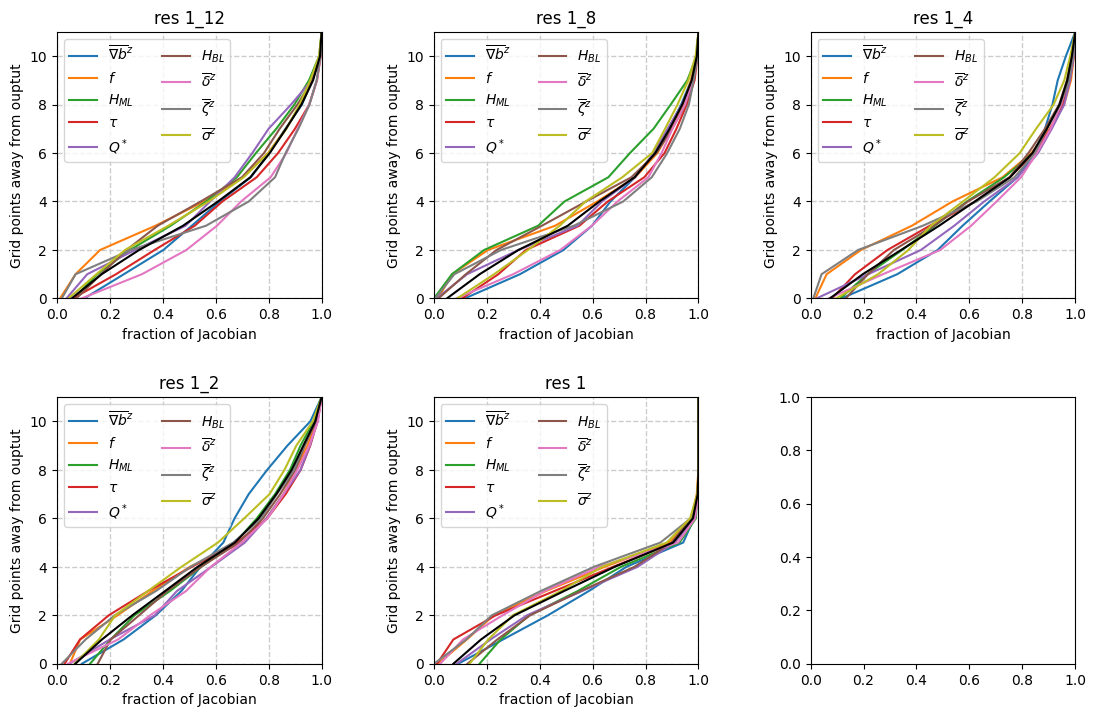

In [21]:
fig, main_ax = plt.subplots(nrows=2, ncols=3,figsize=(12,8))
fig.tight_layout(pad=5)

for i_res in range(5):
    ax = plt.subplot(2,3,i_res+1)
    for i_ftr in range(9
                      ):
        plt.plot(jacob_ftr_frac_r_res[i_res,i_ftr,:],range(round(r_max)+1),label=input_features_for_plot[i_ftr])
        plt.legend(ncol=2)

    plt.plot(np.mean(jacob_ftr_frac_r_res[i_res,:,:],0),range(round(r_max)+1),'k')
    plt.legend(ncol=2)
    plt.xlim([0,1])
    plt.ylim([0,11])
    plt.grid(color=[0.8,0.8,0.8], linestyle='--', linewidth=1,)
    plt.xlabel('fraction of Jacobian')
    plt.ylabel('Grid points away from ouptut')
    plt.title('res '+res_strg[i_res])
#plt.savefig('./figures/jacobian_feature_importance_halo_grid_resolution_panels')

Text(25.22222222222222, 0.5, 'Grid points away from ouput')

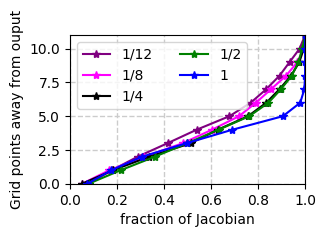

In [111]:
fig, main_ax = plt.subplots(nrows=1, ncols=1,figsize=(5,4))
fig.tight_layout(pad=8)

plt.plot(np.mean(jacob_ftr_frac_r_res[3,:,:],0),range(round(r_max)+1),c= 'purple',marker='*',label='1/12')
plt.plot(np.mean(jacob_ftr_frac_r_res[0,:,:],0),range(round(r_max)+1),c= 'magenta',marker='*',label='1/8')
plt.plot(np.mean(jacob_ftr_frac_r_res[1,:,:],0),range(round(r_max)+1),c= 'k',marker='*',label='1/4')
plt.plot(np.mean(jacob_ftr_frac_r_res[2,:,:],0),range(round(r_max)+1),c= 'green',marker='*',label='1/2')
plt.plot(np.mean(jacob_ftr_frac_r_res[4,:,:],0),range(round(r_max)+1),c= 'blue',marker='*',label='1')
plt.legend(ncol=2)
plt.xlim([0,1])
plt.ylim([0,11])
plt.grid(color=[0.8,0.8,0.8], linestyle='--', linewidth=1,)
plt.xlabel('fraction of Jacobian')
plt.ylabel('Grid points away from ouput')
#plt.savefig('./figures/jacobian_halo_grid_resolution_combined')

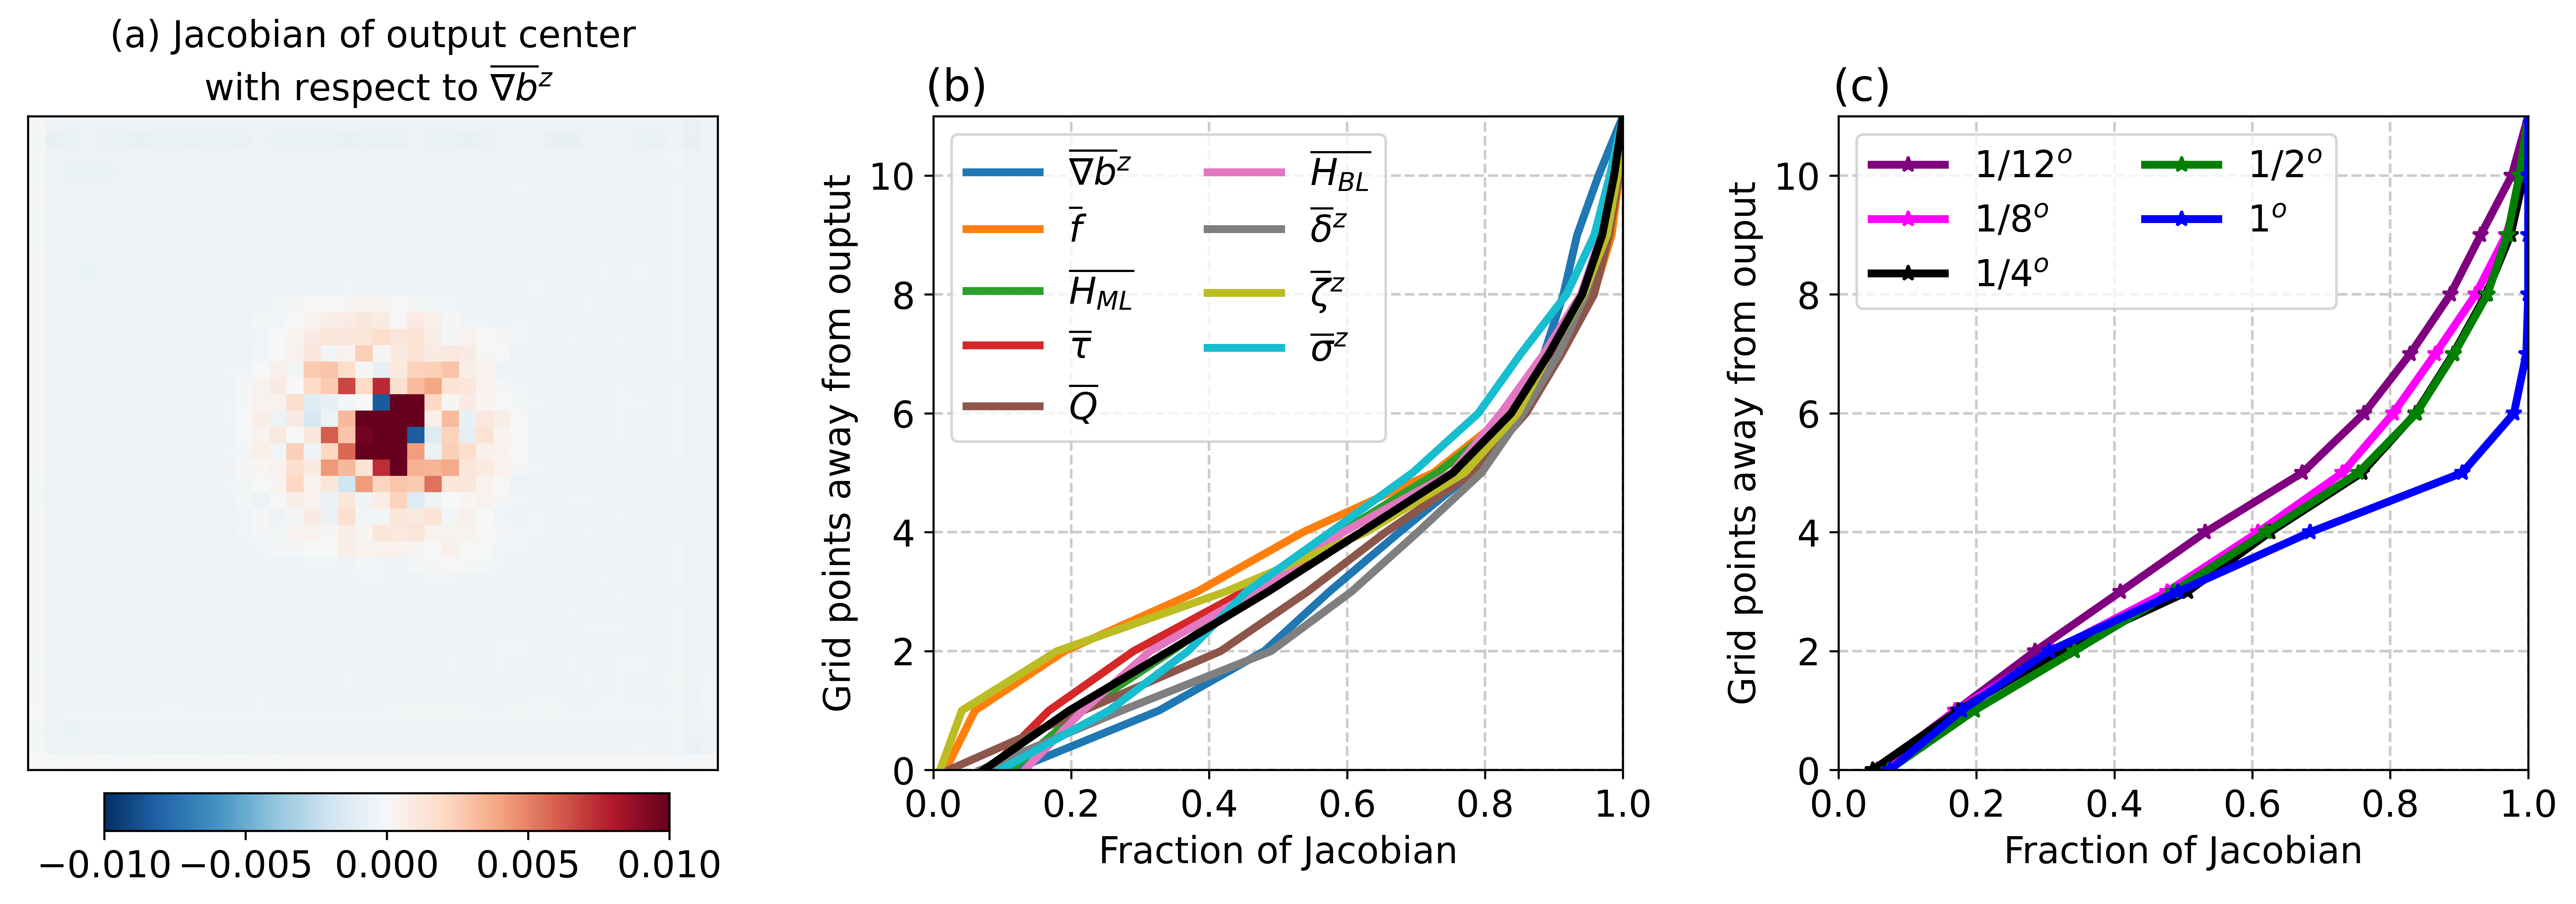

In [27]:
# make three-panel plot 
import matplotlib.cm as cm


fig, main_ax = plt.subplots(nrows=1, ncols=3,figsize=(15,5),dpi=600)
fig.tight_layout(pad=3)
plt.rcParams.update({'font.size': 14})

color = cm.tab10(np.linspace(0, 1, 9))

plt.subplot(1,3,1)
plt.pcolor(jacobian_halo[0].detach().numpy(),cmap='RdBu_r',vmin=-0.01, vmax=0.01)

plt.title('(a) Jacobian of output center\n with respect to '+input_features_for_plot[0], fontsize='14')
plt.xticks([])
plt.yticks([])
#plt.colorbar(bbox_to_anchor=(0.06, 1))
cbaxes = fig.add_axes([0.093, 0.110, 0.2, 0.04]) 
plt.colorbar(cax = cbaxes,orientation = 'horizontal')




plt.subplot(1,3,2)
#for i_ftr in range(9):
for i_ftr, c_loc in zip(range(9),color):
    plt.plot(jacob_ftr_frac_r_res[2,i_ftr,:],range(round(r_max)+1),label=input_features_for_plot[i_ftr],linewidth=3,color=c_loc)
    plt.legend(ncol=2)

plt.plot(np.mean(jacob_ftr_frac_r_res[2,:,:],0),range(round(r_max)+1),'k',linewidth=3)
plt.legend(ncol=2)
plt.xlim([0,1])
plt.ylim([0,11])
plt.grid(color=[0.8,0.8,0.8], linestyle='--', linewidth=1,)
plt.xlabel('Fraction of Jacobian',fontsize=14)
plt.ylabel('Grid points away from ouptut', fontsize='14')
plt.title('(b)                                              ')
 

plt.subplot(1,3,3)
plt.plot(np.mean(jacob_ftr_frac_r_res[3,:,:],0),range(round(r_max)+1),c= 'purple',marker='*',linewidth=3,label='$1/12^o$')
plt.plot(np.mean(jacob_ftr_frac_r_res[0,:,:],0),range(round(r_max)+1),c= 'magenta',marker='*',linewidth=3,label='$1/8^o$')
plt.plot(np.mean(jacob_ftr_frac_r_res[1,:,:],0),range(round(r_max)+1),c= 'k',marker='*',linewidth=3,label='$1/4^o$')
plt.plot(np.mean(jacob_ftr_frac_r_res[2,:,:],0),range(round(r_max)+1),c= 'green',marker='*',linewidth=3,label='$1/2^o$')
plt.plot(np.mean(jacob_ftr_frac_r_res[4,:,:],0),range(round(r_max)+1),c= 'blue',marker='*',linewidth=3,label='$1^o$')
plt.legend(ncol=2)
plt.xlim([0,1])
plt.ylim([0,11])
plt.grid(color=[0.8,0.8,0.8], linestyle='--', linewidth=1,)
plt.xlabel('Fraction of Jacobian',fontsize=14)
plt.ylabel('Grid points away from ouput',fontsize=14)
plt.title('(c)                                              ')
plt.savefig('./figures/jacobian_halo_grid_resolution_all_panels')

